<a href="https://colab.research.google.com/github/memelabela/yourpetcare-ml/blob/main/Your_Pet_Care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the Data

In this case we'll using dataset called **Oxford-IIIT Pet Dataset**. To using that data we'll using **TensorFlow Datasets** because there is a data we want in there so we just need serve that without being explicitly.

In [1]:
# Import packages

import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
file_path = './data/oxford_iiit_pet/'

(training_data, testing_data), info = tfds.load('oxford_iiit_pet', data_dir=file_path, with_info=True, split=['train+test[:75%]', 'test[-25%:]'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to ./data/oxford_iiit_pet/oxford_iiit_pet/3.2.0.incompleteQKQ9JM/oxford_iiit_pet-train.tfrecord


  0%|          | 0/3680 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to ./data/oxford_iiit_pet/oxford_iiit_pet/3.2.0.incompleteQKQ9JM/oxford_iiit_pet-test.tfrecord


  0%|          | 0/3669 [00:00<?, ? examples/s]

Dataset oxford_iiit_pet downloaded and prepared to ./data/oxford_iiit_pet/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [3]:
info

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    version=3.2.0,
    description='The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
images for each class. The images have large variations in scale, pose and
lighting. All images have an associated ground truth annotation of breed.',
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
        'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=7349,
    splits={
        'test': 3669,
        'train': 3680,
    },
    supervised_keys=('image', 'label'),
    citation="""@InProceedings{parkhi12a,
      author       = "Parkhi, O. M. and Vedaldi, A. and Zisserman, A. and Ja

In [4]:
print('Num of training data   : {}'.format(len(training_data)))
print('Num of testing data    : {}'.format(len(testing_data)))
print('Total data             : {}'.format(len(training_data)+len(testing_data)))

Num of training data   : 6432
Num of testing data    : 917
Total data             : 7349


In [5]:
# Convert into dataframe

training_data = tfds.as_dataframe(training_data, info)
testing_data = tfds.as_dataframe(testing_data, info)

In [6]:
training_data.head()

,file_name,image,label,segmentation_mask,species
0,b'Sphynx_158.jpg',"[[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
1,b'english_cocker_spaniel_135.jpg',"[[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...",12,"[[[3], [3], [3], [3], [3], [3], [3], [3], [3],...",1
2,b'British_Shorthair_181.jpg',"[[[44, 32, 6], [44, 34, 7], [44, 34, 7], [41, ...",9,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
3,b'Siamese_161.jpg',"[[[108, 130, 117], [114, 133, 127], [108, 128,...",32,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
4,b'Sphynx_178.jpg',"[[[237, 228, 91], [236, 228, 93], [230, 225, 8...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0


In [7]:
# Format dataframe

training_data['file_name'] = training_data['file_name'].apply(lambda x: x.decode('utf-8'))
testing_data['file_name'] = testing_data['file_name'].apply(lambda x: x.decode('utf-8'))

training_data['label'] = training_data['file_name'].apply(lambda x: x.rsplit('_', 1)[0])
testing_data['label'] = testing_data['file_name'].apply(lambda x: x.rsplit('_', 1)[0])

training_data['file_name'] = training_data['file_name'].apply(
    lambda x: '/content/data/oxford_iiit_pet/downloads/extracted/TAR_GZ.robots.ox.ac.uk_vgg_pets_imageswMR1o1DWRq_DHWToagdXedb7P88RHpceK3WqG77VVwU.tar.gz/images/' + x)
testing_data['file_name'] = testing_data['file_name'].apply(
    lambda x: '/content/data/oxford_iiit_pet/downloads/extracted/TAR_GZ.robots.ox.ac.uk_vgg_pets_imageswMR1o1DWRq_DHWToagdXedb7P88RHpceK3WqG77VVwU.tar.gz/images/' + x)

In [8]:
training_data.head()

,file_name,image,label,segmentation_mask,species
0,/content/data/oxford_iiit_pet/downloads/extrac...,"[[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...",Sphynx,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
1,/content/data/oxford_iiit_pet/downloads/extrac...,"[[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...",english_cocker_spaniel,"[[[3], [3], [3], [3], [3], [3], [3], [3], [3],...",1
2,/content/data/oxford_iiit_pet/downloads/extrac...,"[[[44, 32, 6], [44, 34, 7], [44, 34, 7], [41, ...",British_Shorthair,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
3,/content/data/oxford_iiit_pet/downloads/extrac...,"[[[108, 130, 117], [114, 133, 127], [108, 128,...",Siamese,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
4,/content/data/oxford_iiit_pet/downloads/extrac...,"[[[237, 228, 91], [236, 228, 93], [230, 225, 8...",Sphynx,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0


In [9]:
num_classes = training_data['label'].nunique()
classes = sorted(list(training_data['label'].unique()))

print('Num of classes:', training_data['label'].nunique())

Num of classes: 37


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 64

steps_per_epoch = len(training_data) // BATCH_SIZE
validation_steps = len(testing_data) // BATCH_SIZE

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=25,
    shear_range=0.2,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_dataframe(
    training_data,
    x_col='file_name',
    y_col='label',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    target_size=IMG_SIZE,
    shuffle=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    testing_data,
    x_col='file_name',
    y_col='label',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    target_size=IMG_SIZE
)

Found 6432 validated image filenames belonging to 37 classes.
Found 917 validated image filenames belonging to 37 classes.


In [11]:
sample_images, sample_labels = next(iter(train_generator))

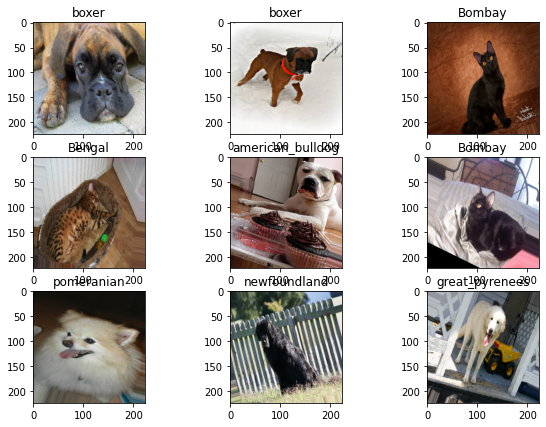

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 3, figsize=(10, 7))

i = 0
for row in range(3):
  for col in range(3):
    axs[row, col].imshow(sample_images[i])
    axs[row, col].set_title(classes[np.argmax(sample_labels[i])])
    i += 1

fig.show()

# Building the Model

We'll use two model first is our model **CNN** and the second is using **Tranfer Learning**. Then when we compare both model, the best model will be chosen for the implementation in **Android** and as an **API**



## CNN (Convolutional Neural Network)

In [13]:
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([                       
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE + (3,)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

  model.compile(optimizer=RMSprop(learning_rate=1e-4),
               loss='categorical_crossentropy',
               metrics=['accuracy'])
  return model

In [14]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [15]:
cnn_history = model.fit(
    train_generator,
    epochs=15,
    verbose=1,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps)

Epoch 1/15
100/100 [==============================] - 117s 1s/step - loss: 3.5589 - accuracy: 0.0561 - val_loss: 3.3931 - val_accuracy: 0.0804
Epoch 2/15
100/100 [==============================] - 94s 943ms/step - loss: 3.2703 - accuracy: 0.1079 - val_loss: 3.2304 - val_accuracy: 0.1217
Epoch 3/15
100/100 [==============================] - 93s 929ms/step - loss: 3.1042 - accuracy: 0.1552 - val_loss: 3.0415 - val_accuracy: 0.1641
Epoch 4/15
100/100 [==============================] - 93s 928ms/step - loss: 3.0000 - accuracy: 0.1698 - val_loss: 3.0834 - val_accuracy: 0.1652
Epoch 5/15
100/100 [==============================] - 92s 923ms/step - loss: 2.9149 - accuracy: 0.1927 - val_loss: 3.0115 - val_accuracy: 0.1696
Epoch 6/15
100/100 [==============================] - 93s 934ms/step - loss: 2.8430 - accuracy: 0.2139 - val_loss: 2.8994 - val_accuracy: 0.1987
Epoch 7/15
100/100 [==============================] - 91s 907ms/step - loss: 2.7814 - accuracy: 0.2282 - val_loss: 2.8778 - val_accu

## Transfer Learning Model

### Inception V3

In [16]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-31 09:29:38--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 142.250.73.208, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  54.4MB/s    in 1.5s    

2022-05-31 09:29:39 (54.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = IMG_SIZE + (3,), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [23]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [25]:
from tensorflow.keras import Model

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(num_classes, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

In [26]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [27]:
inception_history = model.fit(
            train_generator,
            validation_data=test_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=10,
            validation_steps=validation_steps,
            verbose=1)

Epoch 1/10
100/100 [==============================] - 102s 977ms/step - loss: 1.7281 - accuracy: 0.5323 - val_loss: 0.7634 - val_accuracy: 0.7712
Epoch 2/10
100/100 [==============================] - 94s 938ms/step - loss: 0.6363 - accuracy: 0.7944 - val_loss: 0.5744 - val_accuracy: 0.8225
Epoch 3/10
100/100 [==============================] - 93s 933ms/step - loss: 0.4402 - accuracy: 0.8576 - val_loss: 0.5204 - val_accuracy: 0.8292
Epoch 4/10
100/100 [==============================] - 94s 941ms/step - loss: 0.3388 - accuracy: 0.8912 - val_loss: 0.4164 - val_accuracy: 0.8627
Epoch 5/10
100/100 [==============================] - 93s 930ms/step - loss: 0.2458 - accuracy: 0.9212 - val_loss: 0.5200 - val_accuracy: 0.8426
Epoch 6/10
100/100 [==============================] - 93s 926ms/step - loss: 0.2128 - accuracy: 0.9328 - val_loss: 0.5213 - val_accuracy: 0.8449
Epoch 7/10
100/100 [==============================] - 94s 940ms/step - loss: 0.1798 - accuracy: 0.9394 - val_loss: 0.4268 - val_a

#### Evaluate the result

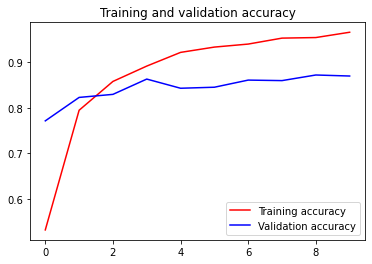

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

acc = inception_history.history['accuracy']
val_acc = inception_history.history['val_accuracy']
loss = inception_history.history['loss']
val_loss = inception_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

### Resnet50-V2

In [29]:
import tensorflow_hub as hub

resnet50 = 'https://tfhub.dev/google/bit/m-r50x1/1'

resnet50_model = tf.keras.models.Sequential([
  hub.KerasLayer(resnet50, input_shape=IMG_SIZE + (3,), trainable=True),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

resnet50_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23500352  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dense_7 (Dense)             (None, 37)                4773      
                                                                 
Total params: 23,767,397
Trainable params: 23,767,397
Non-trainable params: 0
_________________________________________________________________


In [30]:
resnet50_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [31]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 mode='min',
                                                 min_delta=0.01,
                                                 patience=3,
                                                 factor=0.25,
                                                 verbose=1,
                                                 min_lr=0.0000001)

early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 mode='min',
                                                 min_delta=0.005,
                                                 patience=7,
                                                 verbose=1,
                                                 restore_best_weights=True)

In [32]:
resnet50_history = resnet50_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=25,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[reduce_lr, early_stopper]
)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 161s 1s/step - loss: 2.5141 - accuracy: 0.4077 - val_loss: 0.6311 - val_accuracy: 0.8170 - lr: 1.0000e-04
Epoch 2/25
100/100 [==============================] - 135s 1s/step - loss: 0.7078 - accuracy: 0.7787 - val_loss: 0.3967 - val_accuracy: 0.8839 - lr: 1.0000e-04
Epoch 3/25
100/100 [==============================] - 134s 1s/step - loss: 0.5025 - accuracy: 0.8395 - val_loss: 0.3472 - val_accuracy: 0.8895 - lr: 1.0000e-04
Epoch 4/25
100/100 [==============================] - 133s 1s/step - loss: 0.4010 - accuracy: 0.8695 - val_loss: 0.2837 - val_accuracy: 0.9040 - lr: 1.0000e-04
Epoch 5/25
100/100 [==============================] - 134s 1s/step - loss: 0.3407 - accuracy: 0.8888 - val_loss: 0.2769 - val_accuracy: 0.9018 - lr: 1.0000e-04
Epoch 6/25
100/100 [==============================] - 133s 1s/step - loss: 0.2851 - accuracy: 0.9081 - val_loss: 0.3125 - val_accuracy: 0.9051 - lr: 1.0000e-04
Epoch 7/25
100/100 [==============================]

#### Evaluate the result

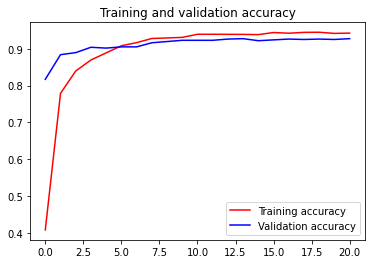

<Figure size 432x288 with 0 Axes>

In [33]:
acc = resnet50_history.history['accuracy']
val_acc = resnet50_history.history['val_accuracy']
loss = resnet50_history.history['loss']
val_loss = resnet50_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Saved Model

Due to the performance of three models that we trained. We can conclude that **Resnet50-V2** is the chosen model to be implemented in our use case.

In [34]:
import time

saved_model_path = '/tmp/saved_models/{}'.format(int(time.time()))
tf.saved_model.save(resnet50_model, saved_model_path)

INFO:tensorflow:Assets written to: /tmp/saved_models/1653994248/assets


INFO:tensorflow:Assets written to: /tmp/saved_models/1653994248/assets


In [35]:
!zip -r /tmp/saved_models.zip /tmp/saved_models

from google.colab import files
files.download("/tmp/saved_models.zip")

  adding: tmp/saved_models/ (stored 0%)
  adding: tmp/saved_models/1653994248/ (stored 0%)
  adding: tmp/saved_models/1653994248/assets/ (stored 0%)
  adding: tmp/saved_models/1653994248/saved_model.pb (deflated 92%)
  adding: tmp/saved_models/1653994248/variables/ (stored 0%)
  adding: tmp/saved_models/1653994248/variables/variables.index (deflated 83%)
  adding: tmp/saved_models/1653994248/variables/variables.data-00000-of-00001 (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Playground

You can try to predict your images below

Saving Taka_Shiba.jpg to Taka_Shiba (1).jpg


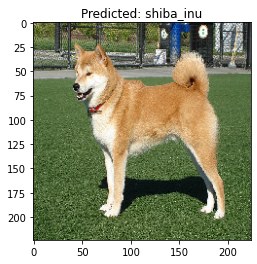

In [42]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=IMG_SIZE)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  result = resnet50_model.predict(images, batch_size=BATCH_SIZE)
  plt.imshow(img)
  plt.title('Predicted: {}'.format(classes[result[0].argmax()]))
  plt.show()